# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data.
#### 2. Data Cleaning.
#### 3. Exploring Relationships.
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Answers to our initial questions with a deeper understanding of the dataset allowing for new questions to be raise.
#### 5. Initial hypothesis.
#### 6. New dataset saved

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check the version of matplot
# may inffluence graphs
matplotlib.__version__

'3.7.1'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
### Define Path

path = r'/Users/aislingm/Documents/Achievement 6'

### Import Boat sales data

df = pd.read_csv(os.path.join(path,'boat_data_cleaned.csv'))

### 2. Data Cleaning

In [5]:
# Upon further reflexion I believe the none value in the material & manufacturer columns should be replaced with
# Unknown as should the NaN values in the Fuel Type columns. 
#I will rename Number of views last 7 days to N. views last 7d as it needs to be descriptive and further reducing it's 
# length could lead to non correct understanding of the data in the column

df.shape

(9241, 11)

In [6]:
df.columns

Index(['Price_Eur', 'Boat Type', 'Manufacturer', 'Year Built', 'Length',
       'Width', 'Material', 'Number of views last 7 days', 'Country',
       'Boat Condition', 'Fuel Type'],
      dtype='object')

In [7]:
print(df.head())

   Price_Eur            Boat Type          Manufacturer  Year Built  Length  \
0    3203.52          Motor Yacht  Rigiflex power boats        2017    4.00   
1    3490.00  Center console boat     Terhi power boats        2020    4.00   
2  193214.00           Sport Boat    Pioner power boats        2020    3.00   
3    3399.00         Fishing Boat    Linder power boats        2019    3.55   
4    3456.00            Catamaran                  none        1999    6.20   

   Width       Material  Number of views last 7 days      Country  \
0   1.90           none                          226  Switzerland   
1   1.50  Thermoplastic                           75      Germany   
2   1.00           none                           64      Denmark   
3   1.46      Aluminium                           58      Germany   
4   2.38      Aluminium                          474  Switzerland   

        Boat Condition Fuel Type  
0  new boat from stock   Unknown  
1  new boat from stock   Unknown  
2  ne

In [8]:
# Check unique values in the 'Boat Condition' column
unique_conditions = df['Boat Condition'].unique()

# Display the unique values
print("Unique Boat Conditions:")
print(unique_conditions)

Unique Boat Conditions:
['new boat from stock' 'Used boat' 'Unknown' 'new boat on order'
 'Display Model']


In [9]:
# Check unique values in the 'Boat Type' column
unique_boat_types = df['Boat Type'].unique()

# Display the unique values
print("Unique Boat Types:")
print(unique_boat_types)

Unique Boat Types:
['Motor Yacht' 'Center console boat' 'Sport Boat' 'Fishing Boat'
 'Catamaran' 'Pontoon Boat' 'Runabout' 'Pilothouse' 'Cabin Boat'
 'Working Boat' 'Deck Boat' 'Classic' 'Bowrider' 'Sport Boat,Working Boat'
 'Cabin Boat,Classic' 'Deck Boat,Pilothouse,Sport Boat' 'Trawler' 'Launch'
 'Cabin Boat,Trawler' 'Bowrider,Classic' 'Motor Yacht,Sport Boat'
 'Classic,Runabout,Sport Boat' 'Cabin Boat,Motor Yacht' 'Classic,Launch'
 'Cabin Boat,Sport Boat' 'Flybridge' 'Water ski' 'Hardtop'
 'Classic,Runabout' 'Offshore Boat'
 'Cabin Boat,Sport Boat,Wakeboard/Wakesurf' 'Classic,Pontoon Boat'
 'Classic,Motor Yacht' 'Motor Yacht,Sport Boat,Trawler' 'Passenger boat'
 'Classic,Sport Boat,Water ski' 'Classic,Sport Boat' 'House Boat'
 'Classic,Motorsailer' 'Sport Boat,Wakeboard/Wakesurf'
 'Pilothouse,Sport Boat' 'House Boat,Motor Yacht'
 'Cabin Boat,Classic,Trawler' 'Passenger boat,Working Boat'
 'Wakeboard/Wakesurf,Water ski' 'Classic,Motor Yacht,Passenger boat'
 'Offshore Boat,Pilothouse'

#### Looking more in depth at our data it is clear that a little more cleaning and wrangling are needed. When we look at the output for our unique vales in our Boat Type Column it is clear that one value contains many types. In order to further analyse out dataset we need to specify the most important type of boat. We split them with delimiter “,”. This is the same method as “Text to column” in Excel. Consider the Boat Type - Main as boat type.

In [10]:
df[['Boat Type Main','Boat Type 2nd', 'Boat Type 3rd']] = df['Boat Type'].str.split(",",expand=True)
print(df[['Boat Type Main','Boat Type 2nd', 'Boat Type 3rd']])

           Boat Type Main Boat Type 2nd Boat Type 3rd
0             Motor Yacht          None          None
1     Center console boat          None          None
2              Sport Boat          None          None
3            Fishing Boat          None          None
4               Catamaran          None          None
...                   ...           ...           ...
9236         Fishing Boat          None          None
9237           Sport Boat          None          None
9238           Sport Boat          None          None
9239         Pontoon Boat          None          None
9240         Fishing Boat          None          None

[9241 rows x 3 columns]


In [11]:
# Check unique values in the 'Boat Type Main' column
unique_boat_types_main = df['Boat Type Main'].unique()

# Display the unique values
print("Unique Boat Types Main:")
print(unique_boat_types_main)

Unique Boat Types Main:
['Motor Yacht' 'Center console boat' 'Sport Boat' 'Fishing Boat'
 'Catamaran' 'Pontoon Boat' 'Runabout' 'Pilothouse' 'Cabin Boat'
 'Working Boat' 'Deck Boat' 'Classic' 'Bowrider' 'Trawler' 'Launch'
 'Flybridge' 'Water ski' 'Hardtop' 'Offshore Boat' 'Passenger boat'
 'House Boat' 'Wakeboard/Wakesurf' 'Ketch' 'Mega Yacht' 'Motorsailer'
 'RIB']


In [12]:
# Check for empty values in 'Boat Types Main'
boat_type_main_missing = df['Boat Type Main'].isnull().sum()
print(f"Number of missing values in 'Boat Type Main': {boat_type_main_missing}")


# Check for empty values in 'Boat Condition'
boat_condition_missing = df['Boat Condition'].isnull().sum()
print(f"Number of missing values in 'Boat Condition': {boat_condition_missing}")

# Check for empty values in 'Fuel Type'
fuel_type_missing = df['Fuel Type'].isnull().sum()
print(f"Number of missing values in 'Fuel Type': {fuel_type_missing}")


Number of missing values in 'Boat Type Main': 0
Number of missing values in 'Boat Condition': 0
Number of missing values in 'Fuel Type': 0


In [13]:
# Check unique values in the 'Fuel Type' column
unique_fuel_types = df['Fuel Type'].unique()

# Display the unique values
print("Unique Fuel Types:")
print(unique_fuel_types)

Unique Fuel Types:
['Unknown' 'Unleaded' 'Diesel' 'Electric']


In [14]:
df['Material'] = df['Material'].apply(lambda x: 'Unknown' if pd.isnull(x) or x.lower() == 'none' else x)
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: 'Unknown' if pd.isnull(x) or x.lower() == 'none' else x)
df['Fuel Type'] = df['Fuel Type'].fillna('Unknown')

# Replace any remaining missing values in the entire DataFrame with 'Unknown'
df = df.fillna('Unknown')

# Print the first few rows to check the modifications
print(df.head())


   Price_Eur            Boat Type          Manufacturer  Year Built  Length  \
0    3203.52          Motor Yacht  Rigiflex power boats        2017    4.00   
1    3490.00  Center console boat     Terhi power boats        2020    4.00   
2  193214.00           Sport Boat    Pioner power boats        2020    3.00   
3    3399.00         Fishing Boat    Linder power boats        2019    3.55   
4    3456.00            Catamaran               Unknown        1999    6.20   

   Width       Material  Number of views last 7 days      Country  \
0   1.90        Unknown                          226  Switzerland   
1   1.50  Thermoplastic                           75      Germany   
2   1.00        Unknown                           64      Denmark   
3   1.46      Aluminium                           58      Germany   
4   2.38      Aluminium                          474  Switzerland   

        Boat Condition Fuel Type       Boat Type Main Boat Type 2nd  \
0  new boat from stock   Unknown       

In [15]:
# Checking for missing values other than Unknown

missing_values = df.isnull().values.any()

if not missing_values:
    print("No missing values (excluding 'Unknown') in the entire DataFrame.")
else:
    print("There are still missing values (excluding 'Unknown') in the DataFrame.")


No missing values (excluding 'Unknown') in the entire DataFrame.


In [16]:
df = df.rename(columns={'Number of views last 7 days': 'N. views last 7d'})


In [17]:
df = df.rename(columns={'Fuel Type': 'Engine Type'})

In [18]:
print(df.head())

   Price_Eur            Boat Type          Manufacturer  Year Built  Length  \
0    3203.52          Motor Yacht  Rigiflex power boats        2017    4.00   
1    3490.00  Center console boat     Terhi power boats        2020    4.00   
2  193214.00           Sport Boat    Pioner power boats        2020    3.00   
3    3399.00         Fishing Boat    Linder power boats        2019    3.55   
4    3456.00            Catamaran               Unknown        1999    6.20   

   Width       Material  N. views last 7d      Country       Boat Condition  \
0   1.90        Unknown               226  Switzerland  new boat from stock   
1   1.50  Thermoplastic                75      Germany  new boat from stock   
2   1.00        Unknown                64      Denmark  new boat from stock   
3   1.46      Aluminium                58      Germany  new boat from stock   
4   2.38      Aluminium               474  Switzerland            Used boat   

  Engine Type       Boat Type Main Boat Type 2nd B

In [19]:
df.dtypes

Price_Eur           float64
Boat Type            object
Manufacturer         object
Year Built            int64
Length              float64
Width               float64
Material             object
N. views last 7d      int64
Country              object
Boat Condition       object
Engine Type          object
Boat Type Main       object
Boat Type 2nd        object
Boat Type 3rd        object
dtype: object

### 3. Exploring Relationships

### Correlations

In [20]:
# Create a correlation matrix using pandas

df.corr()

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/1125721538.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price_Eur,Year Built,Length,Width,N. views last 7d
Price_Eur,1.000000,0.060834,0.221404,0.214517,-0.021602
Year Built,0.060834,1.000000,-0.204647,-0.105334,-0.113179
Length,0.221404,-0.204647,1.000000,0.868722,-0.138331
Width,0.214517,-0.105334,0.868722,1.000000,-0.163870
N. views last 7d,-0.021602,-0.113179,-0.138331,-0.163870,1.000000


/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/2845793157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


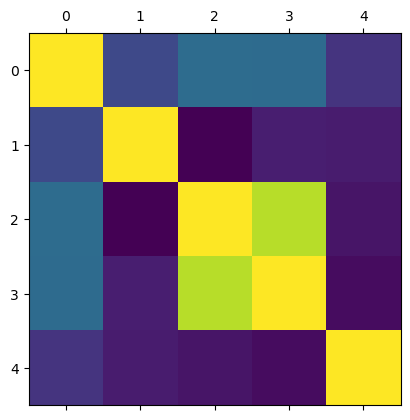

In [21]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/2547027613.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


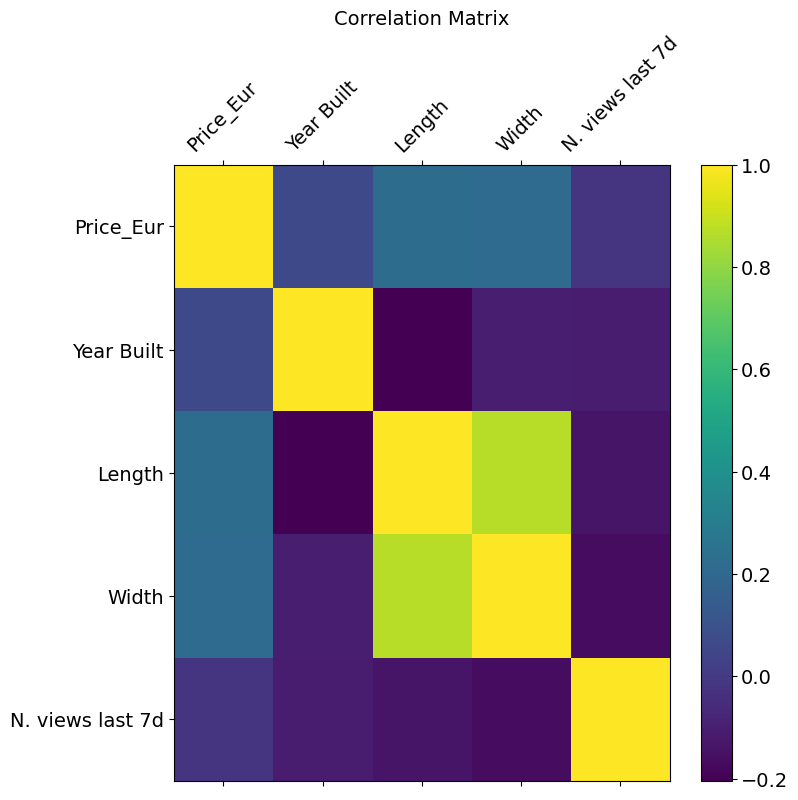

In [22]:
# code to create the correlation heatmap
corr_matrix = df.corr()

# Create a figure with a specific size
f, ax = plt.subplots(figsize=(8, 8))

# Plot the heatmap on the specified axes
im = ax.matshow(corr_matrix, aspect='auto')

# Customize the plot
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

# Show the plot
plt.show()

In [23]:
f.savefig('correlation_matrix.png', bbox_inches='tight')

In [24]:
## Create a correlation heatmap using Seaborn
df.columns

Index(['Price_Eur', 'Boat Type', 'Manufacturer', 'Year Built', 'Length',
       'Width', 'Material', 'N. views last 7d', 'Country', 'Boat Condition',
       'Engine Type', 'Boat Type Main', 'Boat Type 2nd', 'Boat Type 3rd'],
      dtype='object')

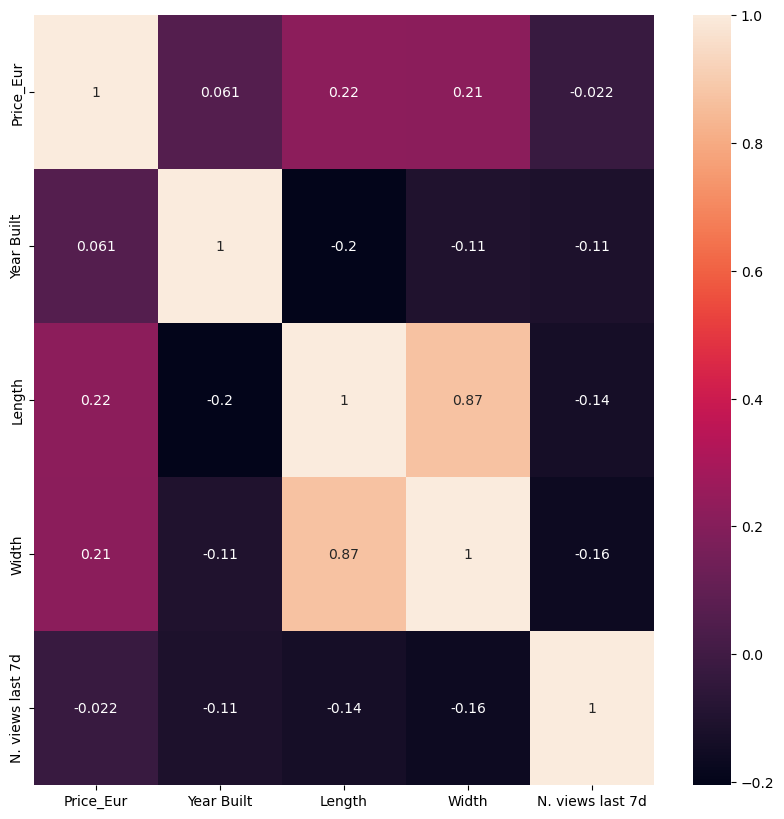

In [25]:
df_sub = df[['Price_Eur', 'Year Built', 'Length', 'Width', 'N. views last 7d']]
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots

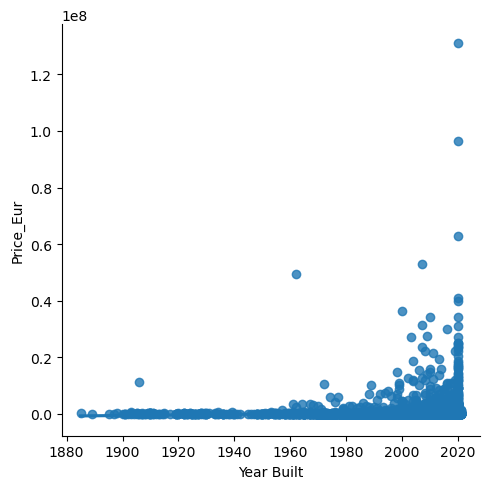

In [26]:
# Create a scatterplot for the "Year Built" and "Price_Eur" columns in seaborn

sns.lmplot(x = 'Year Built', y = 'Price_Eur', data = df)


#### It is clear from the above visulaization that the newer the boat the higher the price

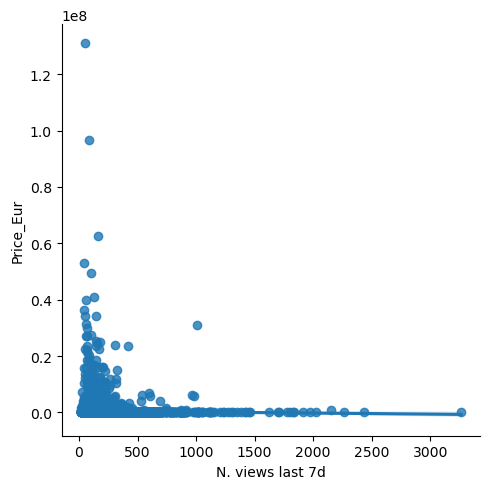

In [27]:
# Create a scatterplot for the "N. views last 7d" and "Price_Eur" columns in seaborn

sns.lmplot(x = 'N. views last 7d', y = 'Price_Eur', data = df)


#### The scatter plot, along with the weak negative correlation coefficient, suggests a very subtle tendency for higher prices to be associated with fewer views and vice versa. However the relationship is week and there are likely other factors, influencing the pattern in our data, that we will have to analyse

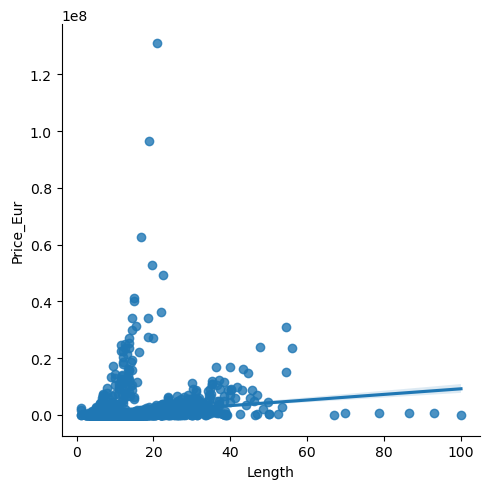

In [28]:
# Create a scatterplot for the "Length" and "Price_Eur" columns in seaborn

sns.lmplot(x = 'Length', y = 'Price_Eur', data = df)


#### bigger boats seem more expensive although the majority of boats are small top medium size.

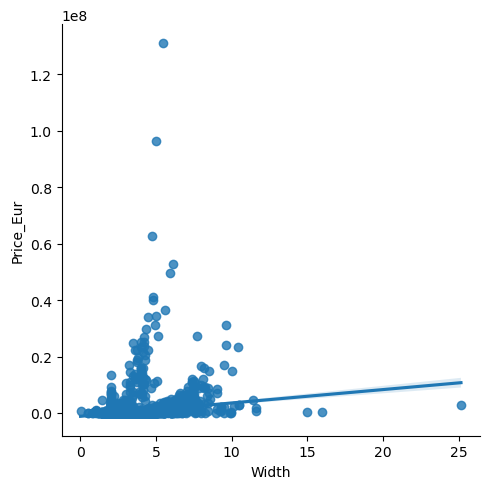

In [29]:
# Create a scatterplot for the "Width" and "Price_Eur" columns in seaborn

sns.lmplot(x = 'Width', y = 'Price_Eur', data = df)


#### Wider boats seem more expensive. Although the majority of boats are under 12 m wide. 

### Pair Plots

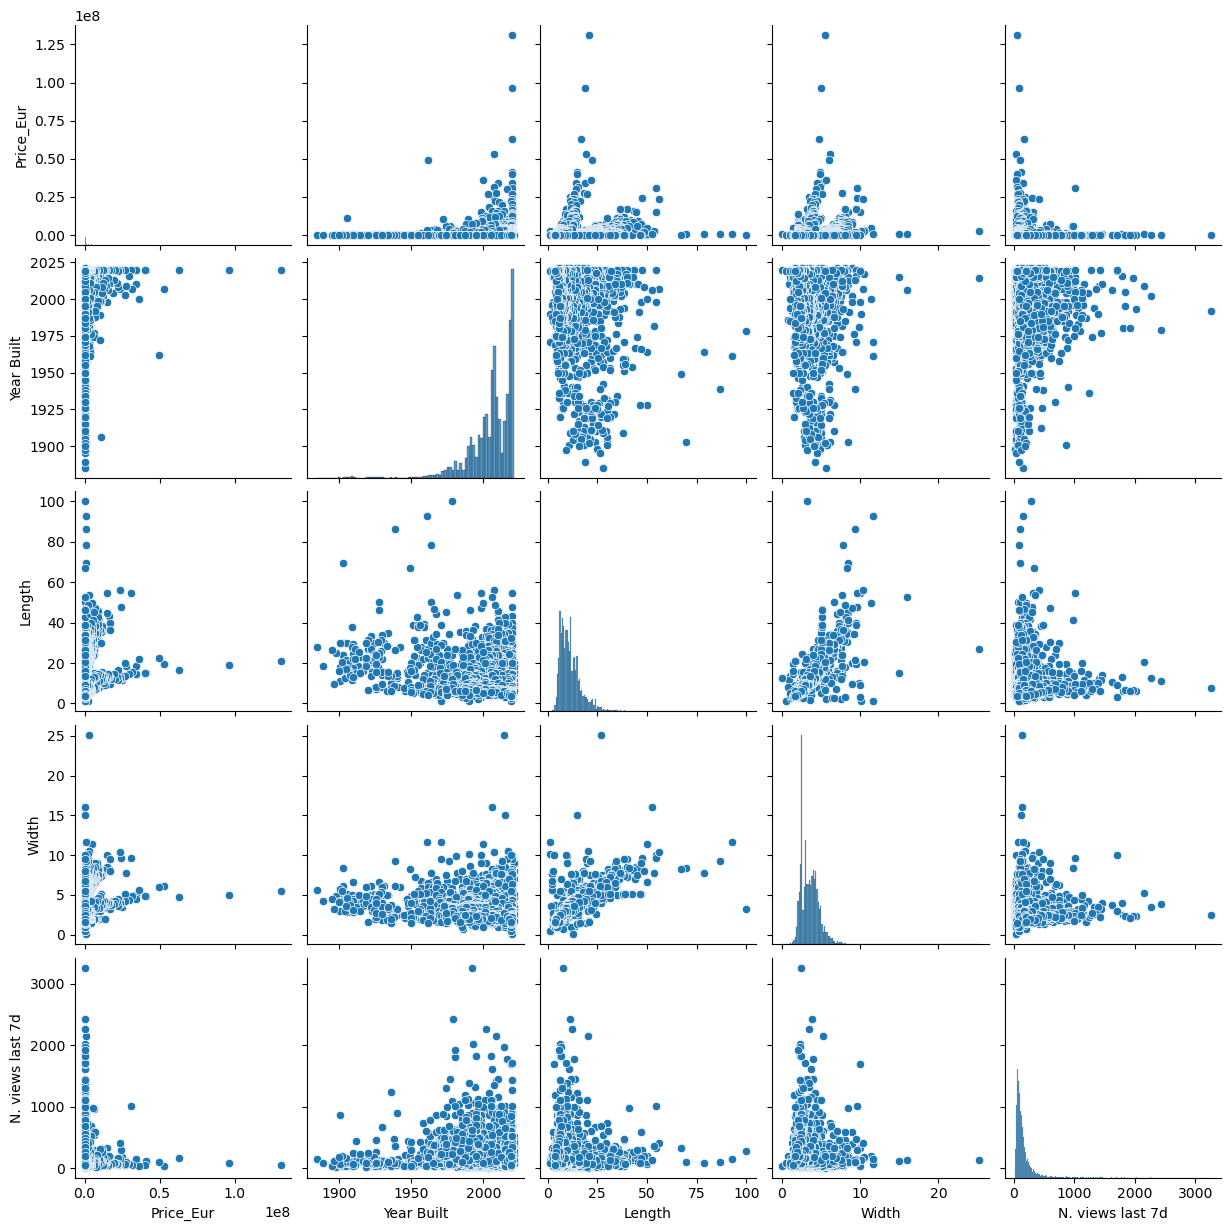

In [30]:
# Create a pair plot of entire dataset
g = sns.pairplot(df)

#### The strongest correlation is between Length & Width, indicating that these two variables tend to increase together. Price is weakly positively correlated with both Width and Length. Year shows weak negative correlations with Views, Width, and Length. There is no strong correlation between Price and Views, suggesting that the price does not strongly influence the number of views. It's important to note that correlation does not imply causation. These findings provide insights into the relationships between variables, but further analysis and domain knowledge are needed to draw meaningful conclusions about the underlying factors influencing these correlations in our specific context.

### Categorical Plots

In [31]:
# Creating a categorical variable that splits the "Price_Eur" column into categories

# Define the bins for price ranges
bins = [0, 50000, 150000, 300000, 1000000, float('inf')]  
# Define labels for each bin
labels = ['lower_50K', '50K-150K', '150K-300K', '300K-1M', 'Higher_1M']

# Create the 'Price_Range_€' column using pd.cut
df['Price_Range_€'] = pd.cut(df['Price_Eur'], bins=bins, labels=labels, include_lowest=True)

In [32]:
# check the column

df['Price_Range_€'].value_counts(dropna = False)

50K-150K     3008
lower_50K    2711
150K-300K    1562
300K-1M      1368
Higher_1M     592
Name: Price_Range_€, dtype: int64

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/2068147506.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price_Range_€', y='N. views last 7d', data=df, order=price_range_order, estimator=sum, ci=None, color='skyblue')


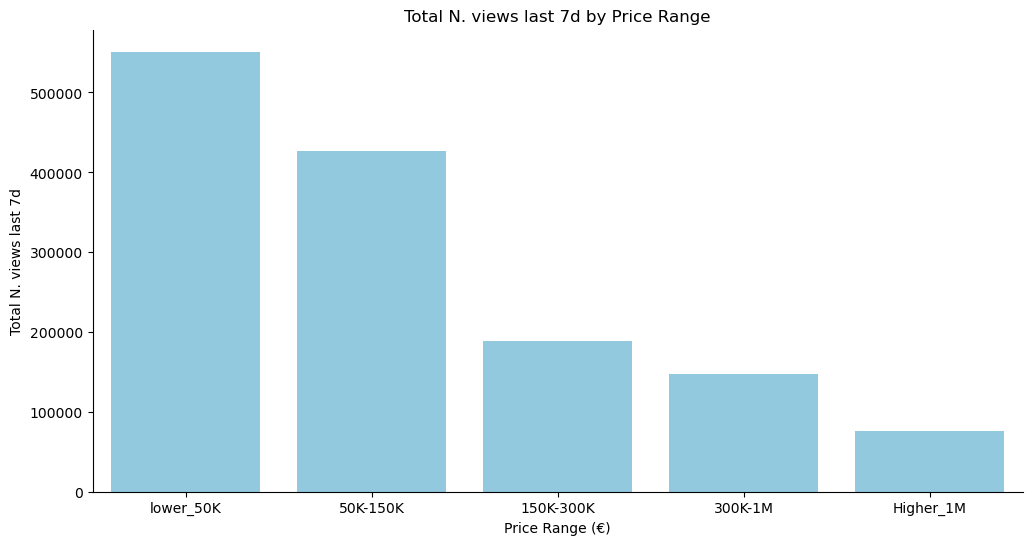

In [33]:
# Define the order of the categories for 'Price_Range_€'
price_range_order = ['lower_50K', '50K-150K', '150K-300K', '300K-1M', 'Higher_1M']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Price_Range_€', y='N. views last 7d', data=df, order=price_range_order, estimator=sum, ci=None, color='skyblue')

# Remove the top and right spines
sns.despine()

# Turn off the grid
plt.grid(False)

# Add labels and title
plt.xlabel('Price Range (€)')
plt.ylabel('Total N. views last 7d')
plt.title('Total N. views last 7d by Price Range')

# Display the bar chart
plt.show()


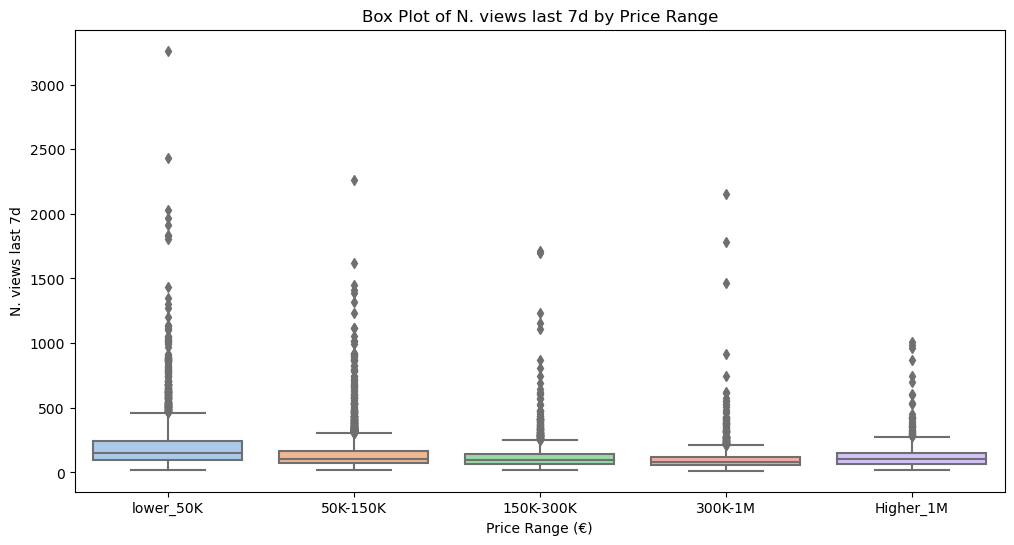

In [34]:
# Box Plot

# Define the order of the categories for 'Price_Range_€'
price_range_order = ['lower_50K', '50K-150K', '150K-300K', '300K-1M', 'Higher_1M']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Range_€', y='N. views last 7d', data=df, order=price_range_order, palette='pastel')
plt.xlabel('Price Range (€)')
plt.ylabel('N. views last 7d')
plt.title('Box Plot of N. views last 7d by Price Range')
plt.show()

In [35]:
# Create a new column 'N. views 7d grouped' with empty strings
df['N. views 7d grouped'] = ''

# Update values based on conditions
df.loc[df['N. views last 7d'] <= 70, 'N. views 7d grouped'] = 'Low (1-70)'
df.loc[(df['N. views last 7d'] > 70) & (df['N. views last 7d'] <= 120), 'N. views 7d grouped'] = 'Medium (71-120)'
df.loc[(df['N. views last 7d'] > 120) & (df['N. views last 7d'] <= 170), 'N. views 7d grouped'] = 'High (121-170)'
df.loc[(df['N. views last 7d'] > 170) & (df['N. views last 7d'] <= 1000), 'N. views 7d grouped'] = 'Very High (171-1000)'
df.loc[df['N. views last 7d'] > 1000, 'N. views 7d grouped'] = 'Best (>1000)'

In [36]:
df['N. views 7d grouped'].value_counts(dropna = False)

Medium (71-120)         2922
Low (1-70)              2341
Very High (171-1000)    2307
High (121-170)          1626
Best (>1000)              45
Name: N. views 7d grouped, dtype: int64

In [37]:
# Check the data types
print(df.dtypes)

Price_Eur               float64
Boat Type                object
Manufacturer             object
Year Built                int64
Length                  float64
Width                   float64
Material                 object
N. views last 7d          int64
Country                  object
Boat Condition           object
Engine Type              object
Boat Type Main           object
Boat Type 2nd            object
Boat Type 3rd            object
Price_Range_€          category
N. views 7d grouped      object
dtype: object


In [38]:
# Convert 'N. views 7d grouped' to numeric
df['N. views 7d grouped'] = pd.to_numeric(df['N. views 7d grouped'], errors='coerce')

# Convert 'Price_Range_€' to numeric
df['Price_Range_€'] = pd.to_numeric(df['Price_Range_€'], errors='coerce')

# Check the data types
print(df.dtypes)

Price_Eur              float64
Boat Type               object
Manufacturer            object
Year Built               int64
Length                 float64
Width                  float64
Material                object
N. views last 7d         int64
Country                 object
Boat Condition          object
Engine Type             object
Boat Type Main          object
Boat Type 2nd           object
Boat Type 3rd           object
Price_Range_€          float64
N. views 7d grouped    float64
dtype: object


/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/2051869261.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine Type', y='N. views last 7d', data=df, ci=None, palette='pastel')


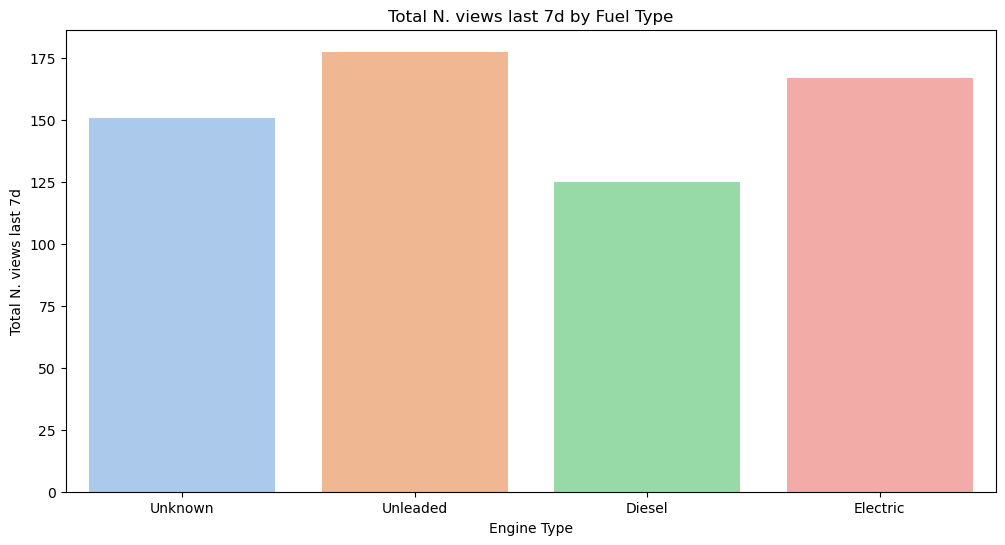

In [39]:
# With a bar plot where 'Fuel Type' is on the x-axis and 'N. views last 7d' is on the y-axis, 
# I can visualize number of views grouped for each category of 'Fuel Type.' 

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine Type', y='N. views last 7d', data=df, ci=None, palette='pastel')
plt.xlabel('Engine Type')
plt.ylabel('Total N. views last 7d')
plt.title('Total N. views last 7d by Fuel Type')
plt.show()

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/751005004.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Engine Type', y='Price_Eur', data=df, ci=None, palette='pastel')


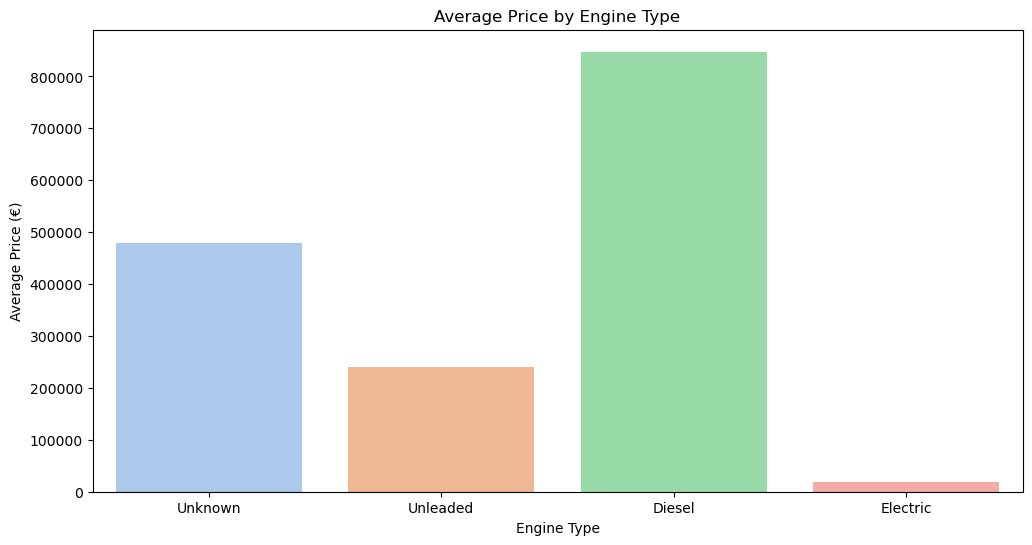

In [40]:
# Create a bar plot  to visualize the relationship between engine types and the continuous variable 'Price_Eur',

plt.figure(figsize=(12, 6))
sns.barplot(x='Engine Type', y='Price_Eur', data=df, ci=None, palette='pastel')
plt.xlabel('Engine Type')
plt.ylabel('Average Price (€)')
plt.title('Average Price by Engine Type')
plt.show()

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/2659502974.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='N. views last 7d', y='Boat Condition', data=df, ci=None, palette='pastel')


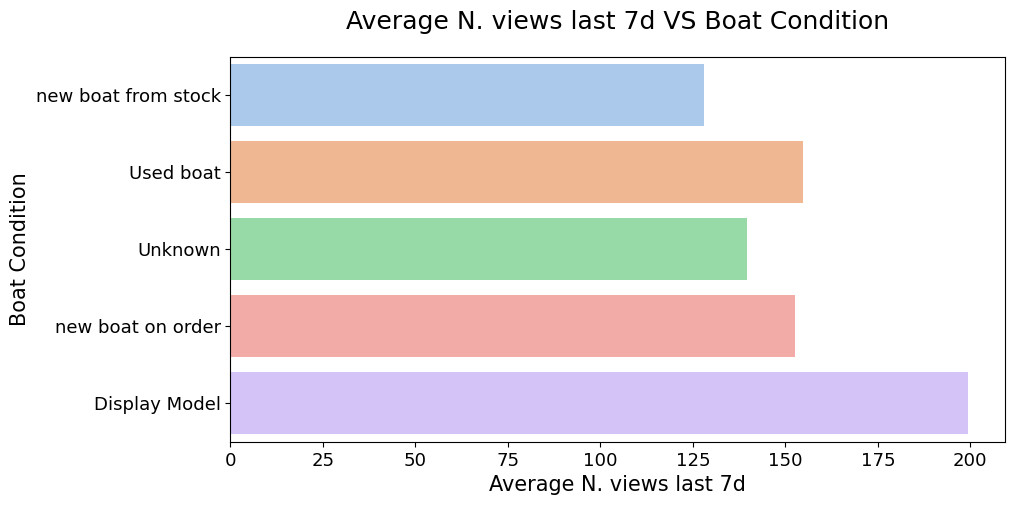

In [41]:
# visualize the average 'N. views last 7d' for each unique boat condition.
# Create a horizontal bar plot

plt.figure(figsize=(10, 5))
sns.barplot(x='N. views last 7d', y='Boat Condition', data=df, ci=None, palette='pastel')

plt.xlabel('Average N. views last 7d', fontsize=15, color='k')
plt.ylabel('Boat Condition', fontsize=15, color='k')
plt.title('Average N. views last 7d VS Boat Condition', fontsize=18, color='k', pad=20)
plt.xticks(fontsize=13, color='k')
plt.yticks(fontsize=13, color='k')

plt.show()

/var/folders/m4/vmdq9y9n2fndv5637y77b2nh0000gn/T/ipykernel_38701/3846064432.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Price_Eur', y='Boat Condition', data=df, ci=None, palette='pastel')


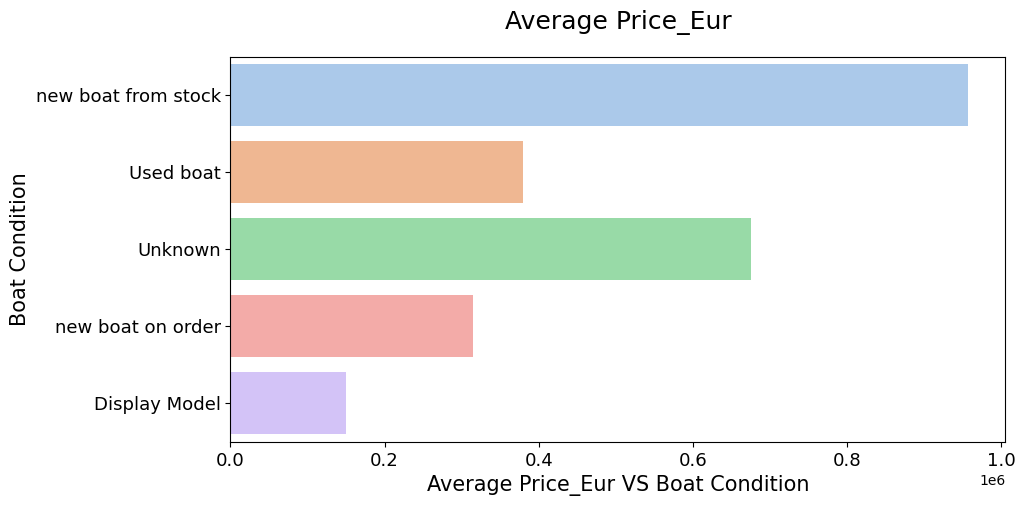

In [42]:
# Visualize the average 'Price_Eur' for each unique 'Boat Condition'
# Create a horizontal bar plot

plt.figure(figsize=(10, 5))
sns.barplot(x='Price_Eur', y='Boat Condition', data=df, ci=None, palette='pastel')
plt.xlabel('Average Price_Eur VS Boat Condition', fontsize=15, color='k')
plt.ylabel('Boat Condition', fontsize=15, color='k')
plt.title('Average Price_Eur', fontsize=18, color='k', pad=20)
plt.xticks(fontsize=13, color='k')
plt.yticks(fontsize=13, color='k')

plt.show()


In [43]:
df.shape

(9241, 16)

In [44]:
# check Year Built Column

df['Year Built'].value_counts(dropna = False)

2020    1277
2019     658
2008     454
2007     389
2006     389
        ... 
1914       1
1895       1
1885       1
1931       1
1900       1
Name: Year Built, Length: 120, dtype: int64

In [45]:
## Create an Age Group Column based on tyhe Year Buit data

# Print unique values in the 'Year Built' column for debugging
print(df['Year Built'].unique())


# Create Age Group bins
bins = [1900, 1950, 1975, 1990, 2000, 2010, 2015, 2020]
labels = ['1900-1950', '1951-1975', '1976-1990', '1991-2000', '2001-2010', '2011-2015', '2016-2020']

# Create the Age Group column
df['Age Group'] = pd.cut(df['Year Built'], bins=bins, labels=labels, right=False)


[2017 2020 2019 1999 2018 1987 2004 1997 1985 1981 2011 1979 1998 1994
 1996 1972 1980 1974 1983 1991 1992 1961 2000 1993 1968 2007 1990 2010
 1975 1986 1941 1971 2005 1995 1976 2001 2006 2016 1984 1964 1978 1940
 1988 2003 1977 1973 1970 1913 1965 1950 2014 2002 1963 2008 1948 1960
 1930 2009 1989 2015 1969 1982 1937 2013 2012 1954 1959 1909 1926 1910
 1962 1938 1936 1967 1903 1933 1906 1908 2021 1927 1929 1956 1958 1922
 1952 1957 1928 1905 1951 1911 1966 1915 1934 1939 1953 1924 1931 1920
 1898 1955 1907 1885 1895 1914 1901 1942 1919 1925 1889 1946 1904 1923
 1917 1949 1947 1912 1945 1897 1902 1900]


In [46]:
# check the column

df['Age Group'].value_counts(dropna = False)

2001-2010    2893
2016-2020    1741
NaN          1335
1991-2000    1257
2011-2015     920
1976-1990     709
1951-1975     261
1900-1950     125
Name: Age Group, dtype: int64

In [47]:
# Replace NaN values with a specific label 'Unknown'

df['Age Group'] = df['Age Group'].cat.add_categories('Unknown').fillna('Unknown')

# check the column

df['Age Group'].value_counts(dropna = False)

2001-2010    2893
2016-2020    1741
Unknown      1335
1991-2000    1257
2011-2015     920
1976-1990     709
1951-1975     261
1900-1950     125
Name: Age Group, dtype: int64

In [48]:
# Print the updated DataFrame

print(df)

      Price_Eur            Boat Type           Manufacturer  Year Built  \
0       3203.52          Motor Yacht   Rigiflex power boats        2017   
1       3490.00  Center console boat      Terhi power boats        2020   
2     193214.00           Sport Boat     Pioner power boats        2020   
3       3399.00         Fishing Boat     Linder power boats        2019   
4       3456.00            Catamaran                Unknown        1999   
...         ...                  ...                    ...         ...   
9236    4752.00         Fishing Boat  Staempfli power boats        1984   
9237    4704.00           Sport Boat    Sea Ray power boats        1987   
9238    4499.00           Sport Boat  BlueCraft power boats        2020   
9239    4300.00         Pontoon Boat      Whaly power boats        2018   
9240    3628.80         Fishing Boat    DarekCo power boats        2019   

      Length  Width       Material  N. views last 7d      Country  \
0       4.00   1.90        Unk

In [50]:
df.shape

(9241, 17)

In [51]:
df.head()

,Price_Eur,Boat Type,Manufacturer,Year Built,Length,Width,Material,N. views last 7d,Country,Boat Condition,Engine Type,Boat Type Main,Boat Type 2nd,Boat Type 3rd,Price_Range_€,N. views 7d grouped,Age Group
0,3203.52,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,Switzerland,new boat from stock,Unknown,Motor Yacht,Unknown,Unknown,NaN,NaN,2016-2020
1,3490.00,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,Germany,new boat from stock,Unknown,Center console boat,Unknown,Unknown,NaN,NaN,Unknown
2,193214.00,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,Denmark,new boat from stock,Unknown,Sport Boat,Unknown,Unknown,NaN,NaN,Unknown
3,3399.00,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,Germany,new boat from stock,Unknown,Fishing Boat,Unknown,Unknown,NaN,NaN,2016-2020
4,3456.00,Catamaran,Unknown,1999,6.20,2.38,Aluminium,474,Switzerland,Used boat,Unknown,Catamaran,Unknown,Unknown,NaN,NaN,1991-2000


In [52]:
print(df['Price_Range_€'].dtype)

float64


In [53]:
# Define the bins for price ranges
bins = [0, 50000, 150000, 300000, 1000000, float('inf')]
# Define labels for each bin
labels = ['lower_50K', '50K-150K', '150K-300K', '300K-1M', 'Higher_1M']

# Create the 'Price_Range_€' column using pd.cut and convert to 'category'
df['Price_Range_€'] = pd.cut(df['Price_Eur'], bins=bins, labels=labels, include_lowest=True).astype('category')

# Check the unique values and data type of the 'Price_Range_€' column
print(df['Price_Range_€'].value_counts(dropna=False))
print(df['Price_Range_€'].dtype)

50K-150K     3008
lower_50K    2711
150K-300K    1562
300K-1M      1368
Higher_1M     592
Name: Price_Range_€, dtype: int64
category


In [54]:
print(df['N. views 7d grouped'].dtype)

float64


In [55]:
# Define your custom groups
custom_groups = ['Low (1-70)', 'Medium (71-120)', 'High (121-170)', 'Very High (171-1000)', 'Best (>1000)']

# Update values based on conditions for 'N. views 7d grouped'
df.loc[df['N. views last 7d'] <= 70, 'N. views 7d grouped'] = custom_groups[0]
df.loc[(df['N. views last 7d'] > 70) & (df['N. views last 7d'] <= 120), 'N. views 7d grouped'] = custom_groups[1]
df.loc[(df['N. views last 7d'] > 120) & (df['N. views last 7d'] <= 170), 'N. views 7d grouped'] = custom_groups[2]
df.loc[(df['N. views last 7d'] > 170) & (df['N. views last 7d'] <= 1000), 'N. views 7d grouped'] = custom_groups[3]
df.loc[df['N. views last 7d'] > 1000, 'N. views 7d grouped'] = custom_groups[4]

# Convert 'N. views 7d grouped' to 'category' data type
df['N. views 7d grouped'] = df['N. views 7d grouped'].astype('category')

# Check the unique values and data type of the 'N. views 7d grouped' column
print(df['N. views 7d grouped'].value_counts(dropna=False))
print(df['N. views 7d grouped'].dtype)


Medium (71-120)         2922
Low (1-70)              2341
Very High (171-1000)    2307
High (121-170)          1626
Best (>1000)              45
Name: N. views 7d grouped, dtype: int64
category


In [56]:
df.head()

,Price_Eur,Boat Type,Manufacturer,Year Built,Length,Width,Material,N. views last 7d,Country,Boat Condition,Engine Type,Boat Type Main,Boat Type 2nd,Boat Type 3rd,Price_Range_€,N. views 7d grouped,Age Group
0,3203.52,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,Unknown,226,Switzerland,new boat from stock,Unknown,Motor Yacht,Unknown,Unknown,lower_50K,Very High (171-1000),2016-2020
1,3490.00,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,Germany,new boat from stock,Unknown,Center console boat,Unknown,Unknown,lower_50K,Medium (71-120),Unknown
2,193214.00,Sport Boat,Pioner power boats,2020,3.00,1.00,Unknown,64,Denmark,new boat from stock,Unknown,Sport Boat,Unknown,Unknown,150K-300K,Low (1-70),Unknown
3,3399.00,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,Germany,new boat from stock,Unknown,Fishing Boat,Unknown,Unknown,lower_50K,Low (1-70),2016-2020
4,3456.00,Catamaran,Unknown,1999,6.20,2.38,Aluminium,474,Switzerland,Used boat,Unknown,Catamaran,Unknown,Unknown,lower_50K,Very High (171-1000),1991-2000


##### I had to rerun my code for my grouped data columns Price_Range_€  & N. views 7d grouped and change the data type to categorical.

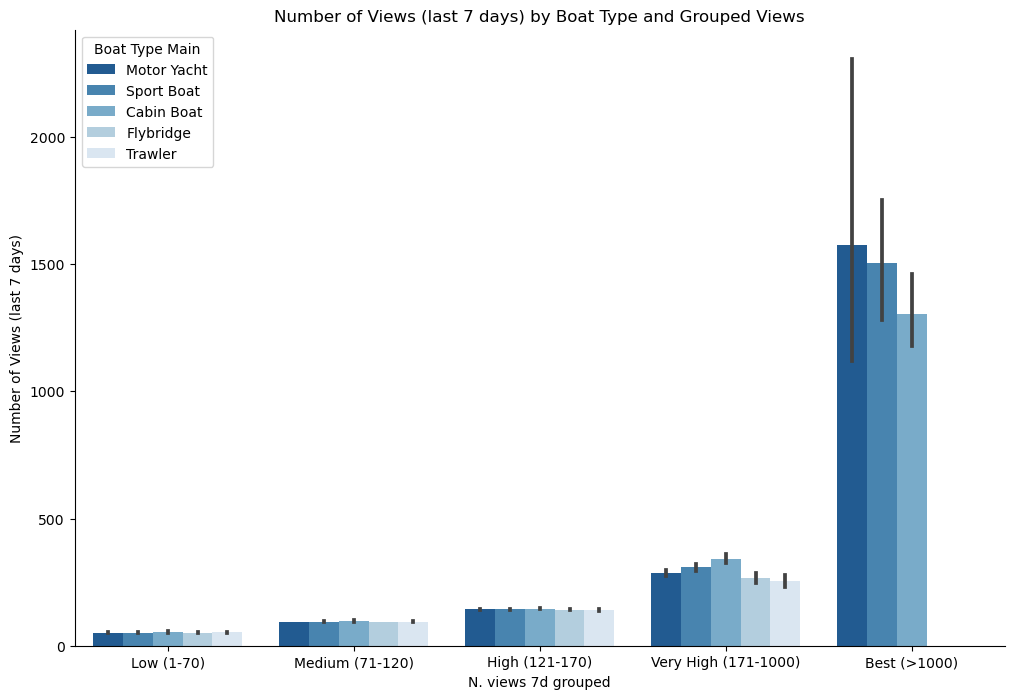

In [61]:

# Select the top 5 Boat Type Main values
top_5_boat_types = df['Boat Type Main'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 Boat Type Main values
df_top_5 = df[df['Boat Type Main'].isin(top_5_boat_types)]

# Set up a custom blue color palette (reversed)
blue_palette = sns.color_palette("Blues_r", n_colors=len(df['N. views 7d grouped'].unique()))

# Specify the order of 'N. views 7d grouped'
order = ['Low (1-70)', 'Medium (71-120)', 'High (121-170)', 'Very High (171-1000)', 'Best (>1000)']

# Set up the plot using the custom color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='N. views 7d grouped', y='N. views last 7d', hue='Boat Type Main', data=df_top_5, palette=blue_palette, order=order)

# Remove lines connecting bars
sns.despine()

# Add labels and legend
plt.title('Number of Views (last 7 days) by Boat Type and Grouped Views')
plt.xlabel('N. views 7d grouped')
plt.ylabel('Number of Views (last 7 days)')
plt.legend(title='Boat Type Main')

# Show the plot
plt.show()


### 4. Answers to initial questions and additional questions

#### 1.  Is there a geographical preference when searching for a boat?
    We can not answer this question at this moment.
#### 2. Is there a fuel type and or boat condition preference?
    Display model boats seem to be the most popular and also the cheapest. Unleaded boats are the most popular    Engine/ Fuel Type although the difference in number of views does not seem to be that significant.
#### 3. How does the cost impact the views? Is it the most expensive boats that get the most views? Or the other way around?
     Display model boats are by far the cheapest and also happen to have the most views
#### 4. Characteristics of the most viewed boat listings in the last 7 days.
     Boat made by GRP material is significantly hot in the current market with over 70% of total market boat material. Some super boat with price over higher 1million Europe choose GRP as its core material. GRP is lighter and stronger and It’s easier for boat owners to repair boats.
#### 5. Are there common features among the most viewed boats?
     Further indepth analysis will be needed to answer this question

### 5. Initial Hypothesis

    Views and Price Relationship:
    Hypothesis: There may be a correlation between boat views and pricing, with potential variations based on
    price ranges.
    Boat Type Impact on Views:
    Hypothesis: Different boat types may have varying popularity, influencing the number of views.
    Categorization Impact:
    Hypothesis: Grouping views into categories could reveal associations between view ranges and specific boat   types or pricing.
    Regional Popularity:
    Hypothesis: Boats located in certain regions may receive more views, reflecting regional preferences or   interests in boating.
    Pricing Variation by Location:
    Hypothesis: The pricing of boats might vary based on geographical locations, influenced by factors such as   local demand, economic conditions, or regional trends.
    
    These hypotheses capture the key insights and relationships we could explore in our data analysis.

### 6. New dataset saved

In [62]:
df.to_csv('/Users/aislingm/Documents/Achievement 6/6.2 Images and Assets/DataSets/boat_sales_62.csv', index=False)
